## Exercise 1: Simulation experiments and KDE

### Question 1

In [55]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.neighbors import KernelDensity
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore") #to ignore warnings that the kde plots raise

(a) For a kernel K = 1[−1,1]/2, compute and display the graph of the resulting KDE obtained with different
bandwidth values h ∈ H = {10^{−5} , 10^{−3} , 10^{−1} , 10}.

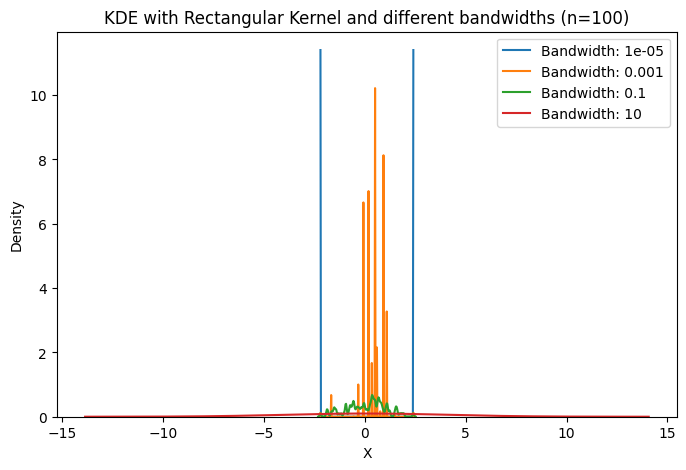

In [56]:
# Define a function to compute and plot the KDE of a given realisation X with a kernel K = 1[−1,1]/2
def KDE_rectangle_plot(X, n):
    # Bandwidth values
    H = [10**(-5), 10**(-3), 10**(-1), 10]

    # Compute and plot KDE for each bandwidth value
    plt.figure(figsize=(8, 5))
    for i, h in enumerate(H):
      sns.kdeplot(X, bw_adjust=h, kernel='tophat', label=f'Bandwidth: {h}')

    plt.title(f'KDE with Rectangular Kernel and different bandwidths (n={n})')
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Draw one realization of n = 100 independent random variables X1,...,Xn from a standard Gaussian distribution N(0,1)
n = 100
X = np.random.normal(0, 1, n)

# Compute and plot the KDE
KDE_rectangle_plot(X, n)


What do you see?

We notice that as the bandwith increases, the curve becomes smoother. For low values of the bandwith, the resulting KDE has lots of "jumps" and huge changes in variation, i.e. is less smooth.

(b) Repeat the same experiment with n = 10 000.

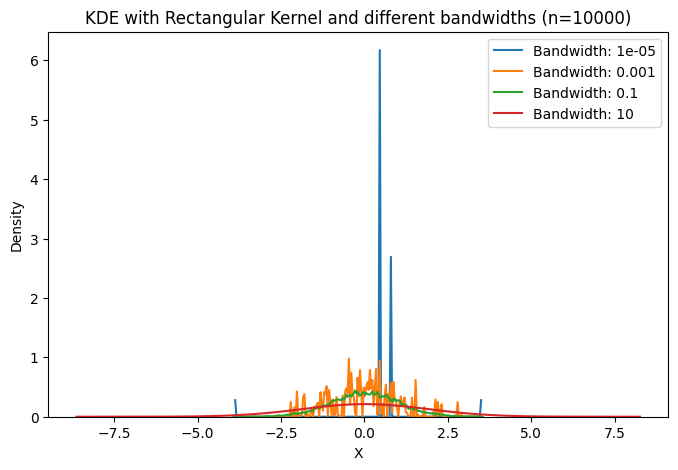

In [57]:
n_2 = 10000
X_2 = np.random.normal(0, 1, n_2)

KDE_rectangle_plot(X_2,n_2)

Is there a change? Comment.

We notice a change as the curves are overall nnoticeably smoother. Otherwise, the KDEs show the same behavior as in the previous plot.

(c) Let us now consider a Gaussian kernel. 
Reproduce the same experiments as in the above two questions.

In [51]:
# Define a function to compute and plot the KDE of a given realisation X with a Gaussian kernel
def KDE_gaussian_plot(X, n):
    # Bandwidth values
    H = [10**(-5), 10**(-3), 10**(-1), 10]
    
    # Compute and plot KDE for each bandwidth value
    plt.figure(figsize=(8, 5))
    for i, h in enumerate(H):
        sns.kdeplot(X, bw_adjust=h, kernel='gaussian', label=f'Bandwidth: {h}')

    plt.title(f'KDE with Gaussian Kernel and different bandwidths (n={n})')
    plt.xlabel('X')
    plt.ylabel('Density')
    plt.legend()
    plt.show()

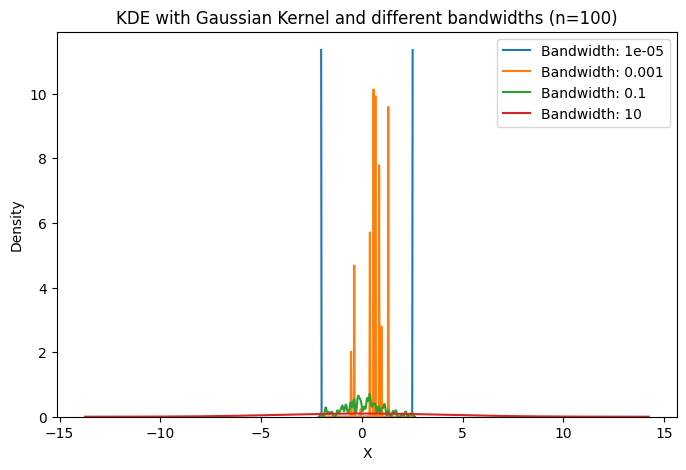

In [66]:
# n = 100 realizations
X_3 = np.random.normal(0, 1, n)
KDE_gaussian_plot(X_3,n)

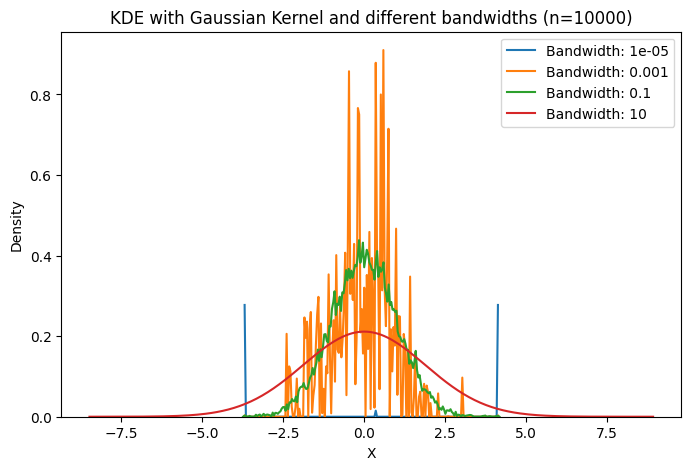

In [73]:
# n = 10000 realizations
X_4 = np.random.normal(0, 1, n_2)
KDE_gaussian_plot(X_4, n_2)

Make a “by eye” comparison regarding the quality of the approximation you get.

In those two plots, we also notice the same behavior as before: the higher the value of the bandwidth, the smoother the curve of the KDE. One noticeable difference between the KDE with the rectangular kernel and the Gaussian kernel is that the KDEs with the Gaussian kernels really look like Gaussian curves (i.e. bell shaped)

### Question 2

(a) Start with x_0 = −2. Which value of h is the best?

In [60]:
# Define a function to compute the KDE with rectangular kernel
def KDE_rectangle_manual(X, x0, h):
    return np.mean(0.5 * ((np.abs((X - x0) / h)) <= 1) / h)

# Function for the true density of a given x
def true_density(x):
    return norm.pdf(x)

H = [10**(-5), 10**(-3), 10**(-1), 10]

# Define a function for the Monte Carlo simulations
def MC_simulation(MC_iterations, X, x0):
    mse_values = []
    for h in H:
        kde_values = np.array([KDE_rectangle_manual(X, x0, h) for _ in range(MC_iterations)])
        mse = np.mean((kde_values - true_density(x0))**2)
        mse_values.append(mse)
    best_bandwidth_index = np.argmin(mse_values)
    best_bandwidth = H[best_bandwidth_index]

    print(f"For x0 = {x0}:")
    print(f"The best bandwidth is: {best_bandwidth}")
    print("\n")

X = np.random.normal(0, 1, 100)
MC_simulation(MC_iterations=1000, X=X, x0=-2)
        


For x0 = -2:
The best bandwidth is: 10




(b) Repeat the experiments with x_0 = 0.1. Same question.


In [52]:
MC_simulation(MC_iterations=1000, X=X, x0=0.1)

For x0 = 0.1:
The best bandwidth is: 0.1




Is there a difference? What conclusion could you draw?

There is a difference, as the best bandwidth for x0 = -2 is smaller than the best bandwidth for x0 = 0.1.
We thus conclude that the smaller the absolute value of x0, the smaller the value of the optimal bandwidth.

(c) Display the graph of h ∈ H → DMSE(h). Which value of h is the best?

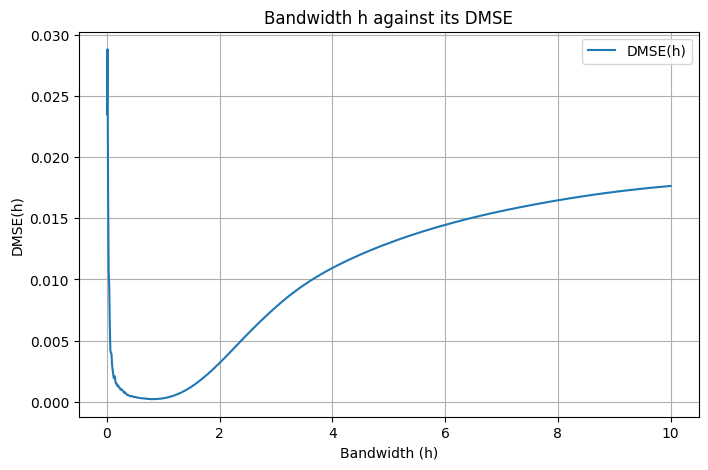

The best bandwidth is: 0.78079




In [78]:
def x_t(t, N):
    return -3 + t*6/N

# Define a function to compute the MSE
def MSE(x0, h):
    kde_values = np.array([KDE_rectangle_manual(X, x0, h)])
    return np.mean((kde_values - true_density(x0))**2)

# Define a function to compute the DMSE
def DMSE(h, N, T):
    S = 0
    for t in range(1,T):
        S += MSE(x_t(t,N), h)
    return S / T

# Define a function to get the best bandwidth
def best_bandwidth(H, dmse_values):
    best_bandwidth_index = np.argmin(dmse_values)
    best_bandwidth = H[best_bandwidth_index]

    print(f"The best bandwidth is: {best_bandwidth}")
    print("\n")

# Define a function to plot the DMSE
def DMSE_plot(H, N, T):
    dmse_values = []
    # We first compute the DMSE 
    for h in H:
        dmse_values.append(DMSE(h, N, T))
    
    plt.figure(figsize=(8, 5))
    plt.plot(H, dmse_values, label='DMSE(h)')
    plt.title('Bandwidth h against its DMSE')
    plt.xlabel('Bandwidth (h)')
    plt.ylabel('DMSE(h)')
    plt.legend()
    plt.grid(True)
    plt.show()
    return dmse_values

T = 200
N = 100
X = np.random.normal(0, 1, N)
H = np.linspace(10**(-5), 10, 1000)

best_bandwidth(H, dmse_values = DMSE_plot(H, N, T))

Is there a change compared to what you observed for the MSE_h(x_0)?

There is indeed a change compared the results observed in Question 2.

### Question 3

(a) Draw the graphs of the KDE function obtained with K for h ∈ H.

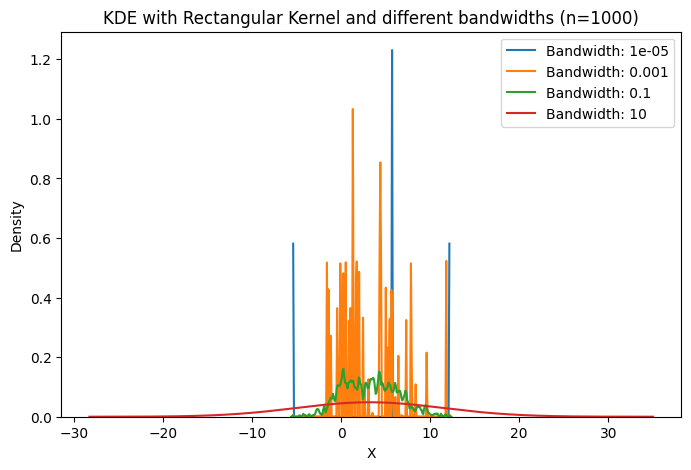

In [79]:
X = np.concatenate((np.random.normal(0, 1, 200), np.random.normal(4, np.sqrt(8), 800)), axis=0)
KDE_rectangle_plot(X, n = 1000)

(b) Draw the graph of h ∈ H→DMSE(h),with x_t =−2+t×10/N,for 1≤t≤T and T = 1000.

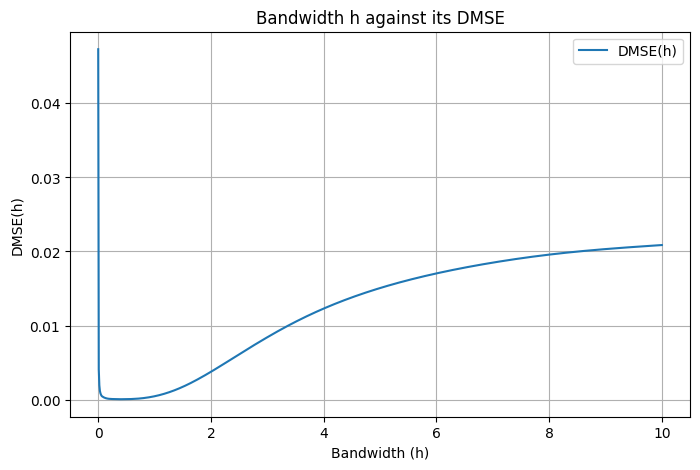

The best bandwidth is: 0.4013603603603604




In [91]:
def x_t(t, N):
    return -2+ t*10/N

T = 1000
N = 1000
X = np.random.normal(0, 1, N)
H = np.linspace(10**(-3), 10, 1000)

best_bandwidth(H, dmse_values = DMSE_plot(H, N, T))
